<a href="https://colab.research.google.com/github/selfor21/NN-Models/blob/main/03_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONVOLUTIONAL NEURAL NETWORK

## Exercício de Apoio - Semana 02

### Convolucional Network - different configuratons




# 1\. Libraries

In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
import keras.datasets as kds
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

print(tf.__version__)

2.12.0


# 2\. Dataset MNIST



### Public dataset with 70000 examples (60K Train / 10K Test)

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png">

Ver: http://yann.lecun.com/exdb/mnist/

## Data loading and preparation

In [67]:
input_shape = (28, 28, 1)

# Keras.datasets
(x_train, y_train), (x_test, y_test) = kds.mnist.load_data()

# Features Normalization
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# One-hot-encoding class convertion
num_classes = len(np.unique(y_train))

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


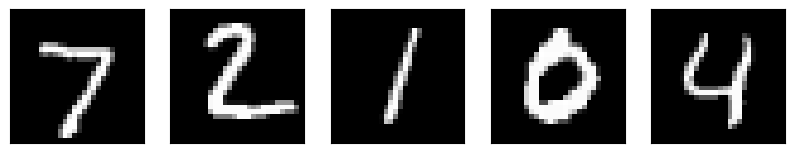

In [68]:
plt.figure(figsize=(10, 8))
for i in range(5):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 3\. Models

We can test different configurations with kernel size, number of layers and number of neurons.

In [69]:
test_loss_l = []
test_acc_l = []
model_l = []
history_l = []
params_l = []

## 3.1 Model kernel 3x3 / 2 Conv 5 & 10 

In [70]:
mod31 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(5, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(10, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

mod31.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 26, 26, 5)         50        
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 13, 13, 5)        0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 11, 11, 10)        460       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 5, 5, 10)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 250)               0         
                                                                 
 dense_11 (Dense)            (None, 10)              

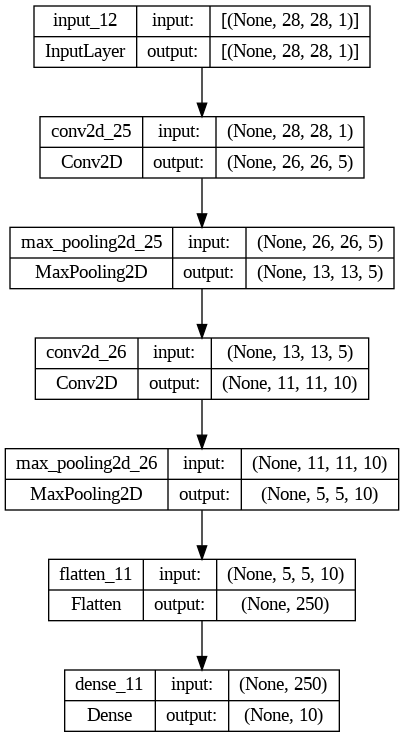

In [71]:
#Graph
tf.keras.utils.plot_model(mod31, show_shapes=True)

In [72]:
mod31.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = mod31.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 3s - loss: 0.9999 - accuracy: 0.7226 - val_loss: 0.3026 - val_accuracy: 0.9141 - 3s/epoch - 15ms/step
Epoch 2/30
188/188 - 1s - loss: 0.2563 - accuracy: 0.9253 - val_loss: 0.1846 - val_accuracy: 0.9494 - 827ms/epoch - 4ms/step
Epoch 3/30
188/188 - 1s - loss: 0.1717 - accuracy: 0.9503 - val_loss: 0.1378 - val_accuracy: 0.9622 - 809ms/epoch - 4ms/step
Epoch 4/30
188/188 - 1s - loss: 0.1338 - accuracy: 0.9609 - val_loss: 0.1150 - val_accuracy: 0.9664 - 783ms/epoch - 4ms/step
Epoch 5/30
188/188 - 1s - loss: 0.1130 - accuracy: 0.9663 - val_loss: 0.1032 - val_accuracy: 0.9704 - 816ms/epoch - 4ms/step
Epoch 6/30
188/188 - 1s - loss: 0.1002 - accuracy: 0.9698 - val_loss: 0.0987 - val_accuracy: 0.9724 - 841ms/epoch - 4ms/step
Epoch 7/30
188/188 - 1s - loss: 0.0904 - accuracy: 0.9726 - val_loss: 0.0889 - val_accuracy: 0.9727 - 822ms/epoch - 4ms/step
Epoch 8/30
188/188 - 1s - loss: 0.0842 - accuracy: 0.9744 - val_loss: 0.0875 - val_accuracy: 0.9737 - 808ms/epoch - 4ms/step
Ep

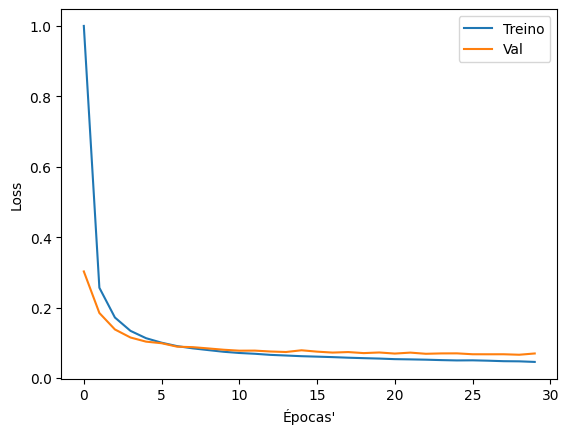

In [73]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label="Treino")
plt.plot(history.history['val_loss'], label="Val")
plt.legend()
plt.show()


In [74]:
# Model Evaluation - Test data
print("Model Evaluation (Test)")
results = mod31.evaluate(x_test, y_test, batch_size=1000)
print("Test loss, Test acc:", results)


Model Evaluation (Test)
10/10 [==============================] - 0s 5ms/step - loss: 0.0540 - accuracy: 0.9837
Test loss, Test acc: [0.05401204153895378, 0.9836999773979187]


In [75]:
model_l.append('K_3x3_2_C_5_10')
test_loss_l.append(results[0])
test_acc_l.append(results[1])
params_l.append(mod31.count_params())

## 3.2 Model kernel 3x3 / 3 Conv 5 & 10 & 10

In [76]:
mod32 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(5, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(10, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(10, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [93]:
mod32.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 26, 5)         50        
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 13, 13, 5)        0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 11, 11, 10)        460       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 5, 5, 10)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 3, 3, 10)          910       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 1, 1, 10)       

In [77]:
mod32.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = mod32.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 3s - loss: 1.6464 - accuracy: 0.4638 - val_loss: 0.7903 - val_accuracy: 0.7504 - 3s/epoch - 13ms/step
Epoch 2/30
188/188 - 1s - loss: 0.6448 - accuracy: 0.7966 - val_loss: 0.4955 - val_accuracy: 0.8500 - 807ms/epoch - 4ms/step
Epoch 3/30
188/188 - 1s - loss: 0.4557 - accuracy: 0.8615 - val_loss: 0.3808 - val_accuracy: 0.8869 - 847ms/epoch - 5ms/step
Epoch 4/30
188/188 - 1s - loss: 0.3658 - accuracy: 0.8899 - val_loss: 0.3150 - val_accuracy: 0.9049 - 838ms/epoch - 4ms/step
Epoch 5/30
188/188 - 1s - loss: 0.3104 - accuracy: 0.9069 - val_loss: 0.2776 - val_accuracy: 0.9159 - 794ms/epoch - 4ms/step
Epoch 6/30
188/188 - 1s - loss: 0.2752 - accuracy: 0.9173 - val_loss: 0.2507 - val_accuracy: 0.9241 - 829ms/epoch - 4ms/step
Epoch 7/30
188/188 - 1s - loss: 0.2527 - accuracy: 0.9231 - val_loss: 0.2305 - val_accuracy: 0.9312 - 852ms/epoch - 5ms/step
Epoch 8/30
188/188 - 1s - loss: 0.2324 - accuracy: 0.9298 - val_loss: 0.2168 - val_accuracy: 0.9349 - 848ms/epoch - 5ms/step
Ep

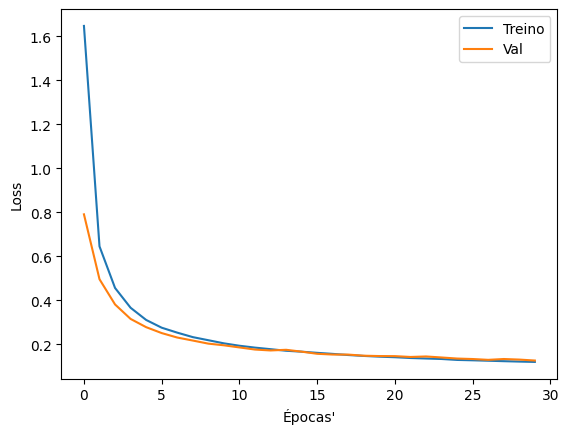

In [78]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label="Treino")
plt.plot(history.history['val_loss'], label="Val")
plt.legend()
plt.show()

In [79]:
# Model Evaluation - Test data
print("Model Evaluation (Test)")
results = mod32.evaluate(x_test, y_test, batch_size=1000)
print("Test loss, Test acc:", results)


Model Evaluation (Test)
10/10 [==============================] - 0s 5ms/step - loss: 0.1200 - accuracy: 0.9623
Test loss, Test acc: [0.1199781596660614, 0.9623000025749207]


In [80]:
model_l.append('K_3x3_3_C_5_10')
test_loss_l.append(results[0])
test_acc_l.append(results[1])
params_l.append(mod32.count_params())

## 3.3 Model Kernel 3x3 / 2 Conv 10 & 20

In [81]:
mod33 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(10, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(20, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [82]:
mod33.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = mod33.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 3s - loss: 0.7401 - accuracy: 0.8124 - val_loss: 0.2203 - val_accuracy: 0.9367 - 3s/epoch - 15ms/step
Epoch 2/30
188/188 - 1s - loss: 0.1805 - accuracy: 0.9466 - val_loss: 0.1397 - val_accuracy: 0.9620 - 816ms/epoch - 4ms/step
Epoch 3/30
188/188 - 1s - loss: 0.1216 - accuracy: 0.9638 - val_loss: 0.1072 - val_accuracy: 0.9687 - 858ms/epoch - 5ms/step
Epoch 4/30
188/188 - 1s - loss: 0.0974 - accuracy: 0.9711 - val_loss: 0.0913 - val_accuracy: 0.9729 - 990ms/epoch - 5ms/step
Epoch 5/30
188/188 - 1s - loss: 0.0833 - accuracy: 0.9750 - val_loss: 0.0858 - val_accuracy: 0.9739 - 990ms/epoch - 5ms/step
Epoch 6/30
188/188 - 1s - loss: 0.0730 - accuracy: 0.9780 - val_loss: 0.0800 - val_accuracy: 0.9765 - 777ms/epoch - 4ms/step
Epoch 7/30
188/188 - 1s - loss: 0.0677 - accuracy: 0.9796 - val_loss: 0.0780 - val_accuracy: 0.9741 - 768ms/epoch - 4ms/step
Epoch 8/30
188/188 - 1s - loss: 0.0631 - accuracy: 0.9807 - val_loss: 0.0696 - val_accuracy: 0.9787 - 747ms/epoch - 4ms/step
Ep

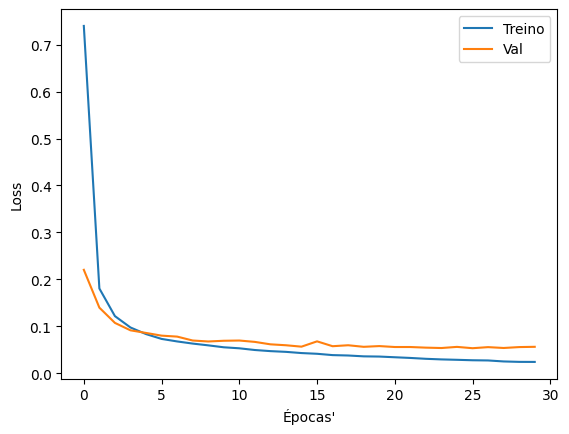

In [83]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label="Treino")
plt.plot(history.history['val_loss'], label="Val")
plt.legend()
plt.show()

In [84]:
# Model Evaluation - Test data
print("Model Evaluation (Test)")
results = mod33.evaluate(x_test, y_test, batch_size=1000)
print("Test loss, Test acc:", results)


Model Evaluation (Test)
10/10 [==============================] - 0s 6ms/step - loss: 0.0456 - accuracy: 0.9861
Test loss, Test acc: [0.04555969685316086, 0.9861000180244446]


In [85]:
model_l.append('K_3x3_3_C_10_20')
test_loss_l.append(results[0])
test_acc_l.append(results[1])
params_l.append(mod33.count_params())

## 3.4 Model kernel 5x5 / 2 Conv 5 & 10

In [86]:
mod34 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(5, kernel_size=(5, 5), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(10, kernel_size=(5, 5), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),        
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [87]:
mod34.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = mod34.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 3s - loss: 0.8200 - accuracy: 0.7805 - val_loss: 0.2668 - val_accuracy: 0.9234 - 3s/epoch - 18ms/step
Epoch 2/30
188/188 - 1s - loss: 0.2411 - accuracy: 0.9299 - val_loss: 0.1891 - val_accuracy: 0.9469 - 793ms/epoch - 4ms/step
Epoch 3/30
188/188 - 1s - loss: 0.1837 - accuracy: 0.9459 - val_loss: 0.1617 - val_accuracy: 0.9542 - 839ms/epoch - 4ms/step
Epoch 4/30
188/188 - 1s - loss: 0.1519 - accuracy: 0.9548 - val_loss: 0.1402 - val_accuracy: 0.9606 - 794ms/epoch - 4ms/step
Epoch 5/30
188/188 - 1s - loss: 0.1314 - accuracy: 0.9609 - val_loss: 0.1234 - val_accuracy: 0.9641 - 788ms/epoch - 4ms/step
Epoch 6/30
188/188 - 1s - loss: 0.1158 - accuracy: 0.9657 - val_loss: 0.1218 - val_accuracy: 0.9641 - 849ms/epoch - 5ms/step
Epoch 7/30
188/188 - 1s - loss: 0.1068 - accuracy: 0.9679 - val_loss: 0.1087 - val_accuracy: 0.9672 - 791ms/epoch - 4ms/step
Epoch 8/30
188/188 - 1s - loss: 0.0961 - accuracy: 0.9710 - val_loss: 0.1028 - val_accuracy: 0.9691 - 767ms/epoch - 4ms/step
Ep

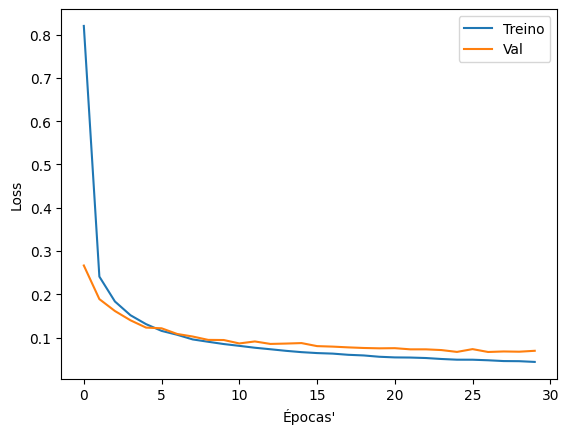

In [88]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label="Treino")
plt.plot(history.history['val_loss'], label="Val")
plt.legend()
plt.show()

In [89]:
# Model Evaluation - Test data
print("Model Evaluation (Test)")
results = mod34.evaluate(x_test, y_test, batch_size=1000)
print("Test loss, Test acc:", results)


Model Evaluation (Test)
10/10 [==============================] - 0s 5ms/step - loss: 0.0524 - accuracy: 0.9834
Test loss, Test acc: [0.05236394703388214, 0.9833999872207642]


In [90]:
model_l.append('K_5x5_3_C_5_10')
test_loss_l.append(results[0])
test_acc_l.append(results[1])
params_l.append(mod34.count_params())

# 4. Summary

In [91]:
summary_df = pd
summary_df = pd.DataFrame(model_l, columns=['model'])
summary_df['test_loss'] = test_loss_l
summary_df['test_acc'] = test_acc_l
summary_df['params'] = params_l


In [92]:
summary_df

,model,test_loss,test_acc,params
0,K_3x3_2_C_5_10,0.054012,0.9837,3020
1,K_3x3_3_C_5_10,0.119978,0.9623,1530
2,K_3x3_3_C_10_20,0.045560,0.9861,6930
3,K_5x5_3_C_5_10,0.052364,0.9834,3000
